# Lecture 9

## Machine Learning: Linear and Log-Linear Models

### Generative Algorithms
* Assume that observed data is being "generated" by a "hidden" class label
* Build a different model for each class
* To predict a new example, check it under each of the models and see which one matches best
* Model $P(x | y)$ and $P(y)$, then use Bayes Rule:

$$ P(y | x) = \frac{P(x | y) \cdot P(y)}{P(x)}
$$

### Discriminative Algorithms
* Model conditional distribution of the label given the data $P(y | x)$
* Learns decision boundaries that separate instances of the different classes
* To predict a new example, check on which side of the decision boundary it falls

### Inductive Learning
* **Goal:** given a set of input/output pairs (training data) find the function $f(x)$ that maps inputs to outputs
* **Problem:** we do not see all possible inputs


* Learn an approximate function $h(x)$ from the training data and hope that this function will generalize well to unseen inputs
* **Ockham's razor:** choose the simplest hypothesis that is consistent with the training data
* Contrast with deductive learning: start with general rule and infer new knowledge

### Supervised Learning
* Given: Training data consisting of training examples $(\textbf{x}_1, y_1), ..., (\textbf{x}_n, y_n)$ where $\textbf{x}_i$ is an input example (a $d$-dimensional vector of attribute values) and $y_i$ is the label
* Goal: learn a hypothesis function $h(x)$ that approximates the true relationship between x and y. This function should:
    1. Ideally be consistent with the training data
    2. Generalize to unseen examples

### Classification and Regression
* Two types of supervised learning problems: 
    * Classification: $y_j$ is a finite, discrete set (ex. predict a label from a set of labels), learn a **classifier** function:
$$
h: \mathbb{R}^d \rightarrow \{ -1, +1 \}
$$

    * Regression: $y_j \in \mathbb{R}$ so predict a numerc value, learn a **regressor** function
$$
h: \mathbb{R}^d \rightarrow \mathbb{R}
$$ 

### Training ML Models
* Empirical Risk: how often the model mislabels training data/model error on training data

$$ E_{train}(h) = \sum_{i = 1}^n loss(y_i, h(x_i))
$$

* Training aims to minimize $E_{train}$
* Aim is that minimizing training error will also minimize $E_{test}$, the validation error 

### Overfitting 
* Problem: reducing empirical risk causes **overfitting**, and prevents the model from generalizing well to unseen data
* Preventing overfitting: fewer parameters, regularization to prevent large/spiky parameter values, Ockham's razor

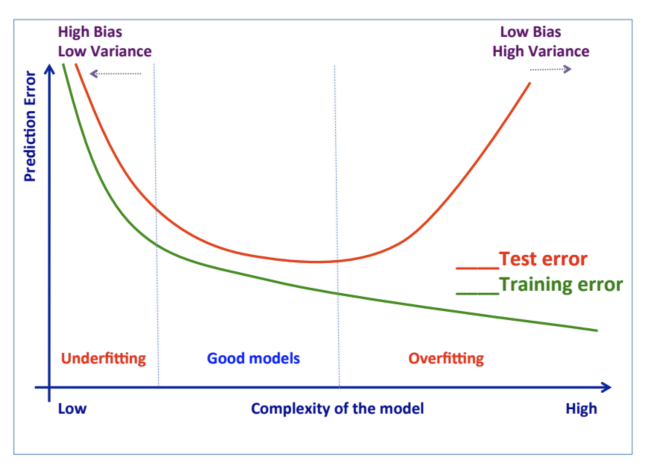

### Linear Models
* Linear models take in a vector of features, and weight these features according to importance by computing the dot product of the features vector and the weights vector
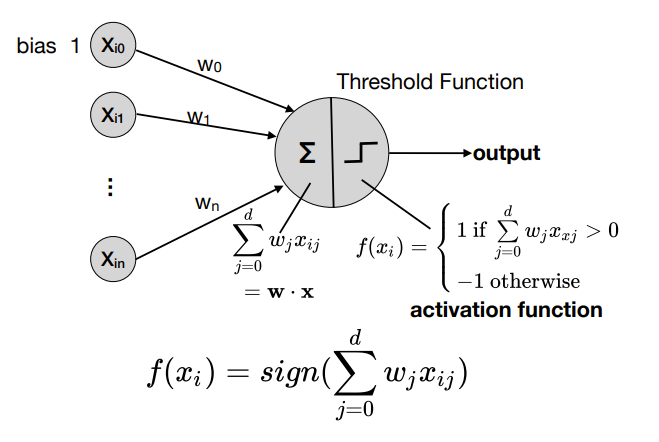


* Model defines a function class of linear separators, specified by the parameter of weights $\textbf{b}$
* Need to estimate $\textbf{b}$ on the basis of the training set

* Minimize classification error in order to minimize loss:

$$
loss(y_i, h(x_i)) = \begin{cases} 1 & \text{if } sign(h(x_i)) \neq sign(y_i) \\
0 & \text{otherwise}
\end{cases}
$$

$$
E_{train}(\textbf{w}) = \sum_{i = 1}^{n} loss(y_i, h(x_i))
$$

### Perceptron Learning
* Normally, take derivative of threshold function and apply gradient descent - however, threshold function (step function) is not differentiable
* Instead use iterative perceptron learning algorithm:
    * Start with an arbitrary hyperplane
    * Adjust using the training data
    * Upate rule: $w_j \leftarrow w_j + (y - h_{\textbf{w}}(\textbf{x})) \times x_j$
* **Perceptron Convergence Theorem** states that any linear function can be learned using this algorithm in a finite number of iterations

### Perceptron Learning Algorithm
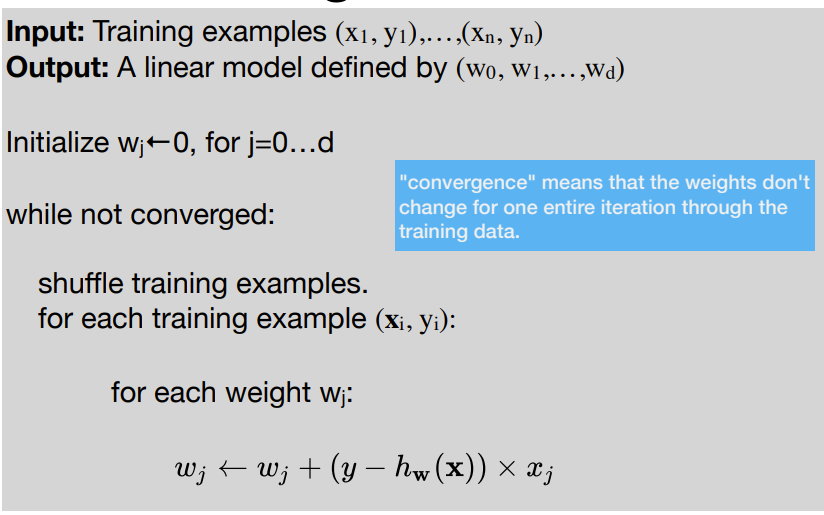

* In order to speed up convergence, can shuffle training data between iterations of the while loop
* Perceptron Learning Algorithm (and linear models in general) can only be applied to data that is linearly separable
* Modeled after the human brain and method of classification

### Logistic Regression
* Output of the linear model is unbounded -- instead, we may want to constrain the output to be between 0 and 1 (in order to interpret the outcome as a probability)
* Step function is not differentiable -- replace step function with the sigmoid function
$$ g(z) = \frac{1}{1 + e^{-z}}
$$

Then we have $g(z) = 0$ if $z \rightarrow -\infty$ and $g(z) = 1$ if $z \rightarrow \infty$

We have the following:
$$
g(\sum_{i = 1}^{d} w_i x_i) = P(\text{class} = 1 | x, w)
$$

### Feature Functions
* Linear models provide only binary decisions, and we often need to make multi-class decisions
* Use a feature function $\phi(x, y)$ where $x$ is an input object and $y$ is a possible output
* The values of $\phi$ are $d$-dimensional vectors

$$ \phi (x, y) : \mathcal{X} \times \mathcal{Y} \rightarrow \mathbb{R}^d
$$

* Feature functions are often indicator functions (value of 0 or 1)

### Multiclass Perceptron
* Apply the linear model $\phi(x,y)$ for each $y$
* Predict the one with the highest score:

$$
f(x) = \arg \max_{y \in Y} \sum_{j = 1}^d w_j \cdot \phi_j(x, y)
$$

* Can still be trained using the perceptron algorithm (with modified classification loss to account for multiple classes)

### Log-Linear Model 
* Also known as Maximum Entropy Model
* Define the conditional probability P(y|x):
$$ 
P(y|x, w) = \frac{\exp(w \cdot \phi(x,y))}{\sum_{y' \in Y} \exp(w \cdot \phi(x, y))}
$$

* We know that $\exp(z) = e^z$ is positive for any z
* $\sum_{y} P(y | x; w) = 1$
* The log-linear model is a form of multinomial logistic regression, and is also known as the softmax function

### Log-Likelihood
* Define the log-likelihood of some model $w$ on the training data $(x_1, y_1), ..., (x_n, y_n)$ as:
$$
LL(w) = \sum_{i = 1}^n \log P(y_i | x_i; w)
$$

* Compute the maximum likelihood using:
$$
LL^*(w) = \arg \max_{w} \sum_{i = 1}^n \log P(y_i | x_i; w)
$$
* Use gradient-based optimization to find a solution

### Simple Gradient Ascent
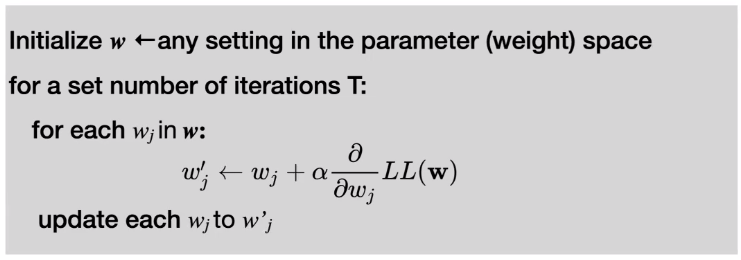

* Follow the gradients (partial derivatives) to find a parameter setting that maximizes $LL(w)$, where $\alpha > 0$ is the **learning rate** or **step size**

### Regularization
* Problem: parameter estimation can overfit the training data
* Can include a regularization term -- for example, $L_2$ regularizer
$$ LL(w) = \sum_{i = 1}^n \log P(y_i | x_i; w) - \frac{\lambda}{2} ||w||^2
$$
* Parameter $\lambda$ controls the strength of the regularization

### POS Tagging with Log-Linear Models
* Previously we used a generative model (HMM) for POS tagging
* Now, we want to use a discriminative model to compute
$$
P(t_1, ..., t_n | w_1, ..., w_n) = \prod_{i = 1}^{m} P(t_i | t_1, ..., t_{i - 1}, t_{i + 1}, ..., t_n, w_1, ..., w_m)
$$

### Maximum Entropy Markov Models (MEMM)
* Make an independence assumption (Markov Assumption) that $t_i$ is independent of all other tags $t_1, ..., t_{i - 2}, t_{i + 1}, ..., t_n$ given $t_{i - 1}$
$$
P(t_1, ..., t_n | w_1, ..., w_n) = \prod_{i = 1}^{m} P(t_i | t_{i - 1}, w_1, ..., w_m)
$$

* Use log-linear model to calculate the probability of a tag sequence
* Find the sequence of tags $t_1, ..., t_n$ that maximizes the probability of the sequence of features